In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("spam.csv",encoding='latin-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
df["v2"][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df=df[["v1","v2"]]

In [6]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [7]:
df["v1"].value_counts()

v1
ham     4825
spam     747
Name: count, dtype: int64

In [8]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [9]:
df=df.rename(columns={"v1":'target',"v2":'text'})

In [10]:
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [11]:
df.duplicated().sum()

403

In [12]:
df=df.drop_duplicates(keep='first')

In [13]:
df.shape

(5169, 2)

In [14]:
df.duplicated().sum()

0

## EDA

In [15]:
df["target"].value_counts()

target
ham     4516
spam     653
Name: count, dtype: int64

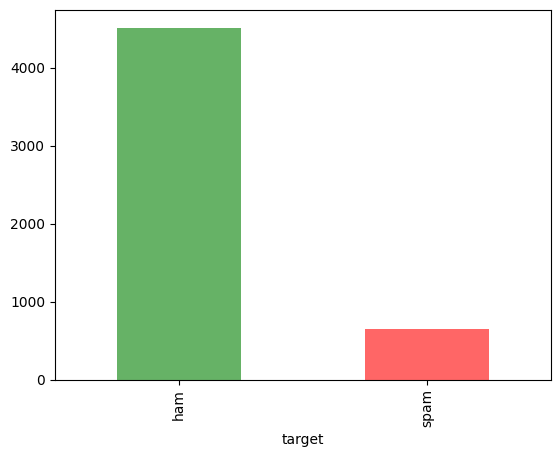

In [16]:
df["target"].value_counts().plot(kind="bar",color=['green','red'],alpha=0.6)
plt.show()

In [17]:
df["target"].value_counts()/len(df)

target
ham     0.87367
spam    0.12633
Name: count, dtype: float64

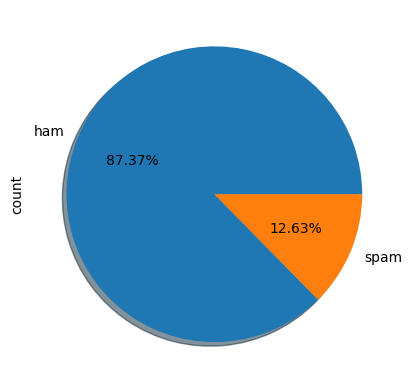

In [18]:
(df["target"].value_counts()/len(df)).plot(kind='pie',autopct='%1.2f%%',shadow=True)
plt.show()

In [19]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
df["text"][2]

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [21]:
#df["text"][2].split(" ")

In [22]:
df["characters"]=df["text"].apply(lambda x: len(x))

In [23]:
df.head(2)

,target,text,characters
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29


In [24]:
from nltk.tokenize import word_tokenize
print(df["text"].apply(lambda x:word_tokenize(x))[2])

from nltk.tokenize import regexp_tokenize
print(df["text"].apply(lambda x:(regexp_tokenize(x,pattern=r'\b\w+\b')))[2])

['Free', 'entry', 'in', '2', 'a', 'wkly', 'comp', 'to', 'win', 'FA', 'Cup', 'final', 'tkts', '21st', 'May', '2005', '.', 'Text', 'FA', 'to', '87121', 'to', 'receive', 'entry', 'question', '(', 'std', 'txt', 'rate', ')', 'T', '&', 'C', "'s", 'apply', '08452810075over18', "'s"]
['Free', 'entry', 'in', '2', 'a', 'wkly', 'comp', 'to', 'win', 'FA', 'Cup', 'final', 'tkts', '21st', 'May', '2005', 'Text', 'FA', 'to', '87121', 'to', 'receive', 'entry', 'question', 'std', 'txt', 'rate', 'T', 'C', 's', 'apply', '08452810075over18', 's']


In [25]:
from nltk.tokenize import regexp_tokenize

df["words"]=df["text"].apply(lambda x:len(regexp_tokenize(x,pattern=r'\b\w+\b')))

In [26]:
df.head()

,target,text,characters,words
0,ham,"Go until jurong point, crazy.. Available only ...",111,20
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,33
3,ham,U dun say so early hor... U c already then say...,49,11
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,14


In [27]:
from nltk.tokenize import sent_tokenize
df["sentences"]=df["text"].apply(lambda x:len(sent_tokenize(x)))

In [28]:
df.head()

,target,text,characters,words,sentences
0,ham,"Go until jurong point, crazy.. Available only ...",111,20,2
1,ham,Ok lar... Joking wif u oni...,29,6,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,33,2
3,ham,U dun say so early hor... U c already then say...,49,11,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,14,1


In [29]:
ham=df[df["target"]=="ham"]
char_value=ham["characters"].value_counts()
len(char_value.value_counts()>=200)

64

In [30]:
ham=df[df["target"]=="spam"]
char_value=ham["characters"].value_counts()
len(char_value.value_counts()>=200)

21

In [31]:
df[df["target"]=="ham"].describe()

,characters,words,sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,14.600974,1.820195
std,56.358207,11.448193,1.383657
min,2.000000,0.000000,1.000000
25%,34.000000,7.000000,1.000000
50%,52.000000,11.000000,1.000000
75%,90.000000,19.000000,2.000000
max,910.000000,190.000000,38.000000


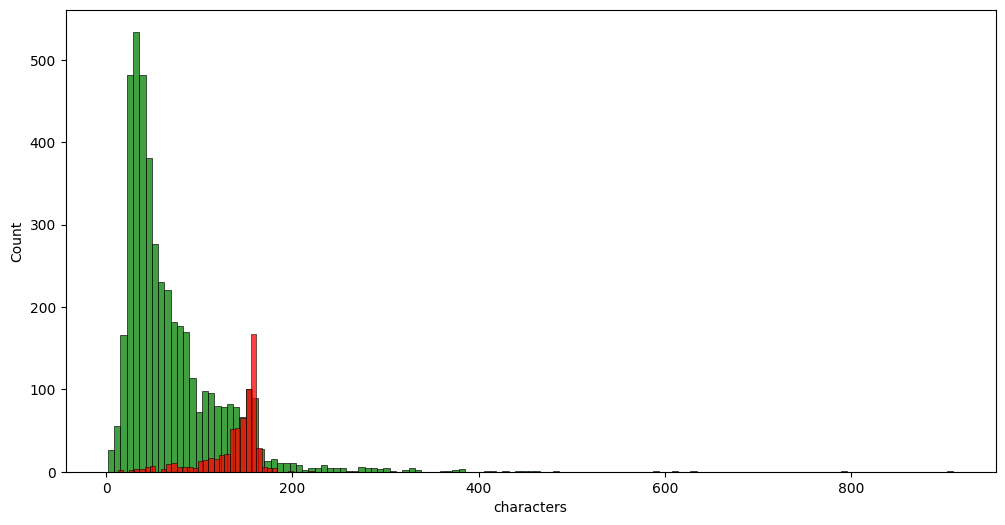

In [32]:
plt.figure(figsize=(12,6))
sns.histplot(df[df["target"]=="ham"]["characters"],color='green')
sns.histplot(df[df["target"]=="spam"]['characters'],color='red')
plt.show()

In [33]:
df[df["target"]=="spam"].describe()

,characters,words,sentences
count,653.000000,653.000000,653.000000
mean,137.891271,25.595712,2.970904
std,30.137753,6.185684,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,24.000000,2.000000
50%,149.000000,27.000000,3.000000
75%,157.000000,29.000000,4.000000
max,224.000000,40.000000,9.000000


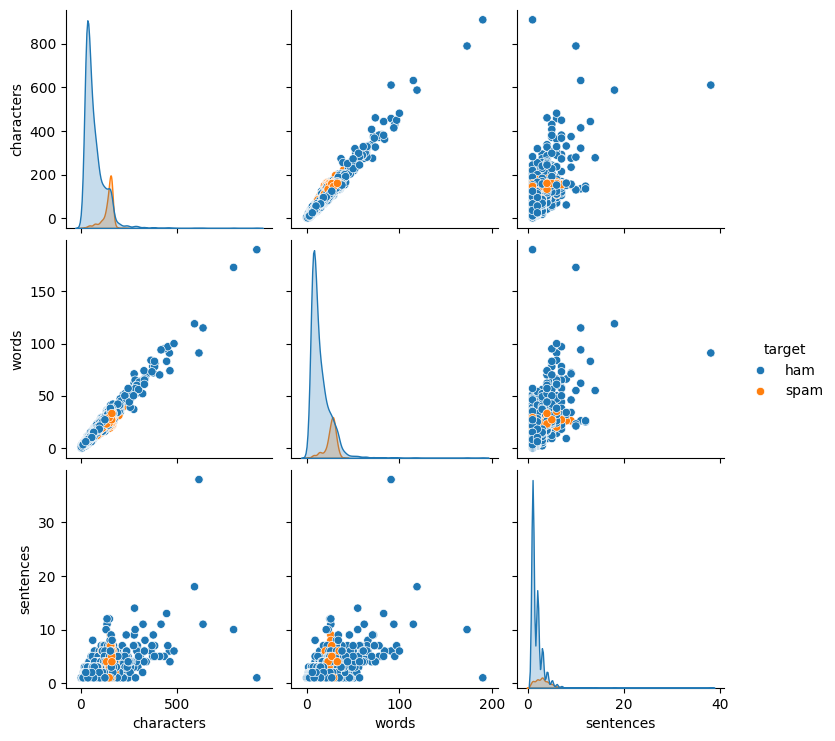

In [34]:
sns.pairplot(df,hue='target')

In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
encoder=LabelEncoder()
df["target"]=encoder.fit_transform(df["target"])

In [37]:
df.head(2)

,target,text,characters,words,sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,20,2
1,0,Ok lar... Joking wif u oni...,29,6,2


In [38]:
numerical_cols=df.select_dtypes(exclude=['object']).columns.to_list()
correlation=df[numerical_cols].corr()
correlation["target"]

target        1.000000
characters    0.384717
words         0.317149
sentences     0.263939
Name: target, dtype: float64

<Axes: >

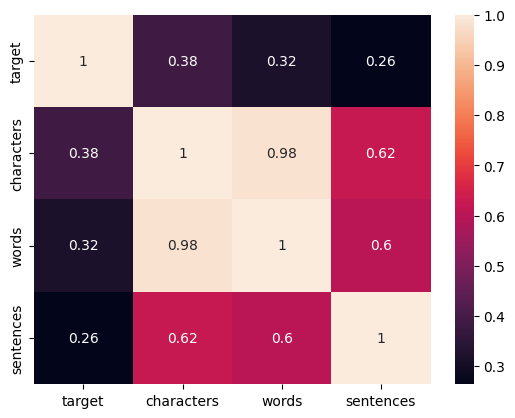

In [39]:
sns.heatmap(correlation,annot=True)

#### There is multicollinearity in between number of characters and number of words,we need to drop two column

# Data Preprocessing

In [40]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stopwords.words("english")


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [41]:
from nltk.stem import WordNetLemmatizer
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [42]:

def transform_text(text):
    text=text.lower() # converting into lower case
    text=regexp_tokenize(text,pattern=r"\b[a-zA-Z]{2,}(?:'\w)?\b") # word tokenization and punctuation removal
    text=([word  for word in text  if word not in stopwords.words("english")] ) # stopwords removal
    wnl=WordNetLemmatizer()
    text=[wnl.lemmatize(word) for word in text] # lemmatization of words
    #text=([word  for word in text  if word not in stopwords.words("english")] )
    text=" ".join(text) # cnverting list into string
   
    return text
    
    
    

In [43]:
transform_text("Free entry i'm in 2,?a wkly comp to win FA Cup final tkts 21st May 2005! @ Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's")

'free entry wkly comp win fa cup final tkts may text fa receive entry question std txt rate apply'

In [44]:
'free entry wkly comp win fa cup final tkts may text fa receive entry question std txt rate apply'

'free entry wkly comp win fa cup final tkts may text fa receive entry question std txt rate apply'

In [45]:
df["text_transformed"]=df["text"].apply(transform_text)

In [46]:
df.head()

,target,text,characters,words,sentences,text_transformed
0,0,"Go until jurong point, crazy.. Available only ...",111,20,2,go jurong point crazy available bugis great wo...
1,0,Ok lar... Joking wif u oni...,29,6,2,ok lar joking wif oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,33,2,free entry wkly comp win fa cup final tkts may...
3,0,U dun say so early hor... U c already then say...,49,11,1,dun say early hor already say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,14,1,nah think go usf life around though


## Creation of wordcloud

### For spam msg

In [47]:
df[df["target"]==1]["text_transformed"]

2       free entry wkly comp win fa cup final tkts may...
5       freemsg hey darling week's word back like fun ...
8       winner valued network customer selected receiv...
9       mobile month entitled update latest colour mob...
11      six chance win cash pound txt send cost day ts...
                              ...                        
5537       want explicit sex sec ring cost min gsex pobox
5540    asked chatlines inclu free min india cust serv...
5547    contract mobile mnths latest motorola nokia et...
5566    reminder get pound free call credit detail gre...
5567    time tried contact pound prize claim easy call...
Name: text_transformed, Length: 653, dtype: object

In [48]:

def most_frequent_words(class_type):
    list_text=df[df["target"]==class_type]["text_transformed"].to_list()
    corpus=[]
    for msg in list_text:
        for word in msg.split():
            corpus.append(word)

    return corpus

In [49]:
spam_corpus=most_frequent_words(1)
print("length of spam_corpus:->",len(spam_corpus))
print()
#print(spam_corpus)

length of spam_corpus:-> 8710



In [50]:
from collections import Counter
spam_words=pd.DataFrame(Counter(spam_corpus).most_common(30))

In [51]:
spam_words

,0,1
0,call,320
1,free,195
2,txt,134
3,text,127
4,ur,119
5,mobile,118
6,stop,109
7,claim,98
8,reply,97
9,prize,83


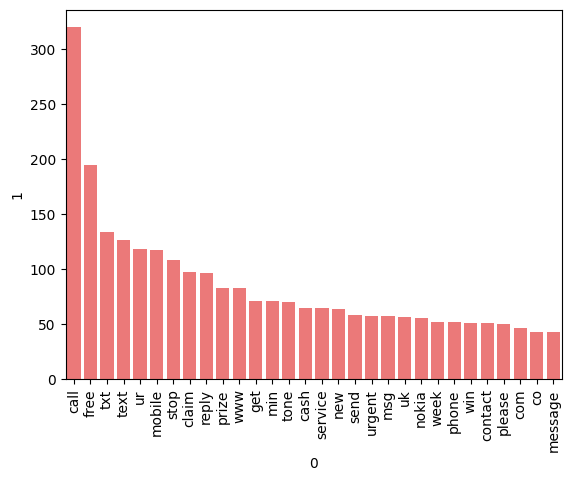

In [52]:
sns.barplot(x=spam_words[0],y=spam_words[1],color='red',alpha=0.6)
plt.xticks(rotation='vertical')
plt.show()

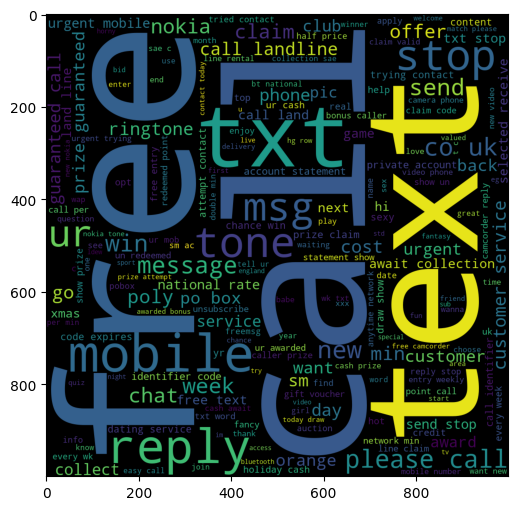

In [53]:
from wordcloud import WordCloud

wc=WordCloud(width=1000,height=1000,min_font_size=10,background_color='black')

spam_wc=wc.generate(df[df["target"]==1]["text_transformed"].str.cat(sep=" "))

plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

### For ham messages

In [54]:
ham_corpus=most_frequent_words(0)
print("length of ham_corpus:->",len(ham_corpus))
print()
#print(ham_corpus)

length of ham_corpus:-> 33715



In [55]:
from collections import Counter
ham_words=pd.DataFrame(Counter(ham_corpus).most_common(30))
ham_words

,0,1
0,get,308
1,gt,288
2,lt,287
3,go,268
4,ok,255
5,know,233
6,got,226
7,come,226
8,like,225
9,time,217


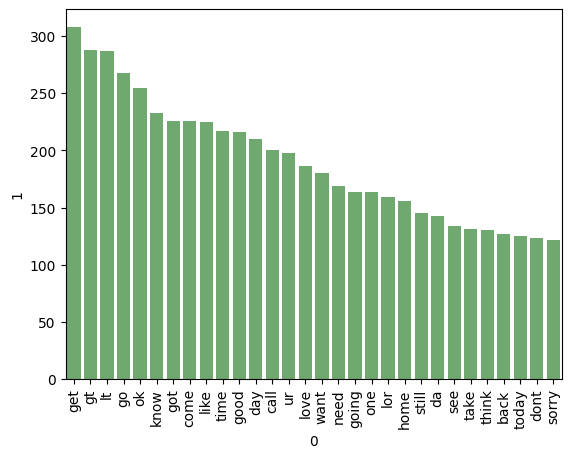

In [56]:
sns.barplot(x=ham_words[0],y=ham_words[1],color='green',alpha=0.6)
plt.xticks(rotation='vertical')
plt.show()

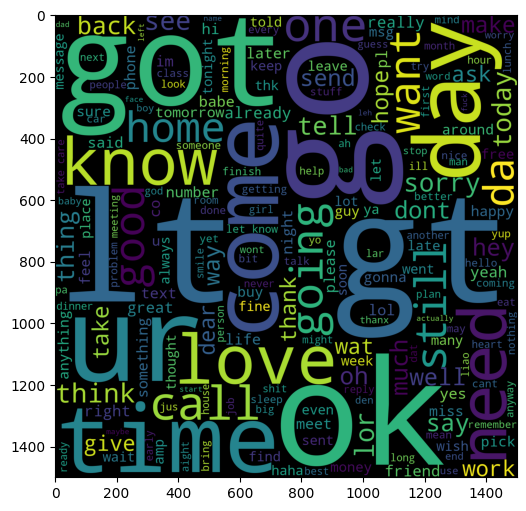

In [57]:

wc=WordCloud(width=1500,height=1500,min_font_size=10,background_color='black') # don't use wc=WordCloud()
# width=1000,height=1000 are the parameter related to words

ham_wc=wc.generate(df[df["target"]==0]["text_transformed"].str.cat(sep=" "))

plt.figure(figsize=(12,6))
plt.imshow(ham_wc)
plt.show()

# Model_Building

### Converting text into vectors

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
#cv=CountVectorizer()
tfidf=TfidfVectorizer()

In [59]:
X=tfidf.fit_transform(df["text_transformed"]).toarray()

In [60]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [61]:
X.shape

(5169, 6864)

In [62]:
y=df["target"].values

In [63]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [66]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [67]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [68]:
def model_train(clf):
    model=clf.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print(accuracy_score(y_test,y_pred))
    print(confusion_matrix(y_test,y_pred))
    print(precision_score(y_test,y_pred))

In [69]:
model_train(gnb)

0.8926499032882012
[[810  86]
 [ 25 113]]
0.5678391959798995


In [70]:
model_train(mnb)

0.9613152804642167
[[896   0]
 [ 40  98]]
1.0


In [71]:
model_train(bnb)

0.9709864603481625
[[889   7]
 [ 23 115]]
0.9426229508196722


In [72]:
# tfidf with mnb

## Try with different algorithms

In [73]:
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import cross_val_score,cross_validate
from sklearn.metrics import make_scorer, roc_auc_score,f1_score,accuracy_score,precision_score,recall_score,confusion_matrix
import time

In [74]:
def select_model(X_train,X_test,y_train,y_test):

    classifiers = {
        "SVC": SVC(),
        "XGBClassifier": XGBClassifier(),
        "LGBMClassifier": LGBMClassifier(),
        "KNeighborsClassifier": KNeighborsClassifier(),
        "DecisionTreeClassifier": DecisionTreeClassifier(),
        "ExtraTreesClassifier": ExtraTreesClassifier(),
        "RidgeClassifier": RidgeClassifier(),
        "SGDClassifier": SGDClassifier(),
        "RandomForestClassifier": RandomForestClassifier(),
        "AdaBoostClassifier": AdaBoostClassifier(),
        "BaggingClassifier": BaggingClassifier(),
        "ComplementNB": ComplementNB(),
        "MultinomialNB": MultinomialNB(),
        "BernoulliNB": BernoulliNB(),
        "GaussianNB": GaussianNB()
    }
    
    cols = ['model', 'run_time','roc_auc', 'precision','accuracy']
    df_models = pd.DataFrame(columns = cols)

    for key, model in classifiers.items():
        start_time = time.time()
        print("Model name:", key)

        model.fit(X,y)
        y_pred=model.predict(X_test)
        cv_results_accuracy=accuracy_score(y_test,y_pred)
        #print(confusion_matrix(y_test,y_pred))
        cv_results_precision=precision_score(y_test,y_pred)
        #print(classification_report(y_test,y_pred))
        cv_results_roc_auc=roc_auc_score(y_test,y_pred)       
        
        row = {'model': key,
               'run_time': format(round((time.time() - start_time)/60,2)),
               'roc_auc': cv_results_roc_auc,
               'precision': cv_results_precision,
               'accuracy': cv_results_accuracy
        }

        df_models = pd.concat([df_models, pd.DataFrame([row])], ignore_index=True)
        #df_models = df_models.append(row, ignore_index=True)
        
    df_models = df_models.sort_values(by='precision', ascending=False)
	
    return df_models

In [75]:
models = select_model(X_train,X_test,y_train,y_test)
print("Step 13: Accessing select_model function done successfully \n\n")
print(models,'\n\n')

Model name: SVC
Model name: XGBClassifier
Model name: LGBMClassifier
[LightGBM] [Info] Number of positive: 653, number of negative: 4516
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016089 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8246
[LightGBM] [Info] Number of data points in the train set: 5169, number of used features: 422
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.126330 -> initscore=-1.933805
[LightGBM] [Info] Start training from score -1.933805
Model name: KNeighborsClassifier
Model name: DecisionTreeClassifier
Model name: ExtraTreesClassifier
Model name: RidgeClassifier
Model name: SGDClassifier
Model name: RandomForestClassifier
Model name: AdaBoostClassifier
Model name: BaggingClassifier
Model name: ComplementNB
Model name: MultinomialNB
Model name: BernoulliNB
Model name: GaussianNB
Step 13: Accessing select_m

In [76]:
def select_model(X,y):

    classifiers = {
        "SVC": SVC(),
        "XGBClassifier": XGBClassifier(),
        "LGBMClassifier": LGBMClassifier(),
        "KNeighborsClassifier": KNeighborsClassifier(),
        "DecisionTreeClassifier": DecisionTreeClassifier(),
        "ExtraTreesClassifier": ExtraTreesClassifier(),
        "RidgeClassifier": RidgeClassifier(),
        "SGDClassifier": SGDClassifier(),
        "RandomForestClassifier": RandomForestClassifier(),
        "AdaBoostClassifier": AdaBoostClassifier(),
        "BaggingClassifier": BaggingClassifier(),
        "ComplementNB": ComplementNB(),
        "MultinomialNB": MultinomialNB(),
        "BernoulliNB": BernoulliNB(),
        "GaussianNB": GaussianNB()
    }

    columns = ['model', 'run_time','roc_auc', 'f1_score','accuracy','precision','recall']
    df_models = pd.DataFrame(columns = columns)
    
    
    for key, model in classifiers.items():
        
        print(f"Training process of Model {key} started")
        start_time = time.time()
                            
        scorers = {
                'roc_auc'  : make_scorer(roc_auc_score),
                'f1_score' : make_scorer(f1_score),
                'accuracy' : make_scorer(accuracy_score),
                'precision': make_scorer(precision_score),
                'accuracy' : make_scorer(accuracy_score),
                'recall'   : make_scorer(recall_score)
            }

        # Perform cross-validation
        cv_results = cross_validate(model, X, y, cv=5, scoring=scorers)
        
        rows = {
            'model': key,
            'run_time': round((time.time() - start_time) / 60, 2),
            'roc_auc': cv_results['test_roc_auc'].mean(),
            'f1_score': cv_results['test_f1_score'].mean(),
            'accuracy': cv_results['test_accuracy'].mean(),
            'precision': cv_results['test_precision'].mean(),
            'recall': cv_results['test_recall'].mean()
        }
        

        df_models=pd.concat([df_models, pd.DataFrame([rows])], ignore_index=True)
        
    df_models = df_models.sort_values(by='precision', ascending=False)
	
    return df_models

In [77]:
models = select_model(X,y)
print("Accessing select_model function done successfully \n")
print(models)

Training process of Model SVC started
Training process of Model XGBClassifier started
Training process of Model LGBMClassifier started
[LightGBM] [Info] Number of positive: 523, number of negative: 3612
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013825 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6124
[LightGBM] [Info] Number of data points in the train set: 4135, number of used features: 342
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.126481 -> initscore=-1.932435
[LightGBM] [Info] Start training from score -1.932435
[LightGBM] [Info] Number of positive: 522, number of negative: 3613
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010036 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info

In [78]:
models

,model,run_time,roc_auc,f1_score,accuracy,precision,recall
12,MultinomialNB,0.03,0.859190,0.835244,0.964404,1.000000,0.718379
8,RandomForestClassifier,4.74,0.897201,0.883938,0.973689,0.996152,0.794844
3,KNeighborsClassifier,0.17,0.657658,0.478670,0.913330,0.994595,0.315537
0,SVC,7.47,0.886182,0.867876,0.970401,0.990434,0.773470
5,ExtraTreesClassifier,14.35,0.904322,0.889415,0.974656,0.986771,0.810194
6,RidgeClassifier,0.31,0.897090,0.878771,0.972334,0.981379,0.796395
7,SGDClassifier,0.13,0.912707,0.894967,0.975623,0.975183,0.828514
1,XGBClassifier,3.44,0.911804,0.885294,0.972914,0.949517,0.830029
13,BernoulliNB,0.06,0.899473,0.870066,0.969627,0.946058,0.805590
9,AdaBoostClassifier,5.38,0.905348,0.871905,0.969626,0.933132,0.819331


#### As we require high precision situation we go with MultinomialNB

In [79]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

# Parameters to tune
param_grid = {
    'alpha': [0.01, 0.1, 0.5, 1, 5, 10],
    'fit_prior': [True, False]
}

# Perform grid search
grid_search = GridSearchCV(MultinomialNB(), param_grid, cv=10, scoring='precision')
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validated precision score: ", grid_search.best_score_)


Best parameters found:  {'alpha': 1, 'fit_prior': True}
Best cross-validated precision score:  1.0


In [80]:
best_model=grid_search.best_estimator_
best_model

MultinomialNB(alpha=1)

In [95]:
import joblib
import pickle
pickle.dump(best_model,open('best_model.pkl', 'wb'))
# pickle.dump(best_model,"MultinomialNB.pkl")

In [88]:
import pickle

def transform_text(text):
    text=text.lower() # converting into lower case
    text=regexp_tokenize(text,pattern=r"\b[a-zA-Z]{2,}(?:'\w)?\b") # word tokenization and punctuation removal
    text=([word  for word in text  if word not in stopwords.words("english")] ) # stopwords removal
    wnl=WordNetLemmatizer()
    text=[wnl.lemmatize(word) for word in text] # lemmatization of words
    #text=([word  for word in text  if word not in stopwords.words("english")] )
    text=" ".join(text) # cnverting list into string
   
    return text

pickle.dump(transform_text, open('transform_text_function.pkl', 'wb'))

In [91]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))

In [96]:
'''
import pickle

# Load the function
with open('transform_text_function.pkl', 'rb') as file:
    transform_text_loaded = pickle.load(file)

# Use the loaded function
sample_text = "This is a sample text to be processed!"
processed_text = transform_text_loaded(sample_text)
print(processed_text)
'''

'\nimport pickle\n\n# Load the function\nwith open(\'transform_text_function.pkl\', \'rb\') as file:\n    transform_text_loaded = pickle.load(file)\n\n# Use the loaded function\nsample_text = "This is a sample text to be processed!"\nprocessed_text = transform_text_loaded(sample_text)\nprint(processed_text)\n'